In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

2021-11-16 08:02:20.042972: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


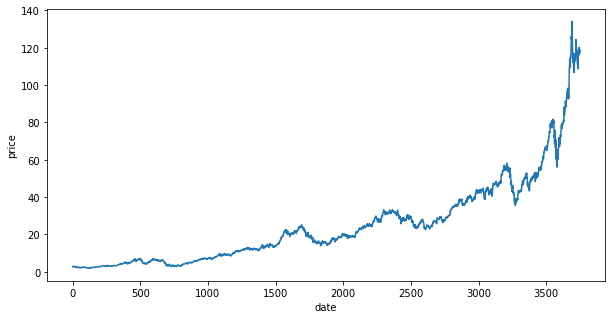

In [3]:
df = pd.read_csv(os.path.join('./Top Tech Companies Stock Price/Technology Companies/AAPL.csv'))

plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.284267
1,2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.290990
2,2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.272961
3,2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.331634
4,2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.323994


In [5]:
split_fraction = 0.75
train_split = int(split_fraction * int(df.shape[0]))

sequence_length = 60
future = 5
learning_rate = 0.001
epochs = 50

features = df[['High', 'Low', 'Open', 'Close', 'Volume']]

In [6]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [7]:
train_data.shape

(2811, 5)

In [8]:
val_data.shape

(938, 5)

In [9]:
x_train = train_data.values
pred_start = sequence_length + future
pred_end = pred_start + train_split
y_train = features.iloc[pred_start:pred_end][['High']].values

x_test = val_data.values[:-sequence_length-future-1]
y_test = features.iloc[train_split+sequence_length+future+1:][['High']].values

In [10]:
print(type(x_train), x_train.shape)

<class 'numpy.ndarray'> (2811, 5)


In [11]:
print(type(y_train), y_train.shape)

<class 'numpy.ndarray'> (2811, 1)


In [12]:
print(type(x_test), x_test.shape)

<class 'numpy.ndarray'> (872, 5)


In [13]:
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (872, 1)


In [4]:
items = ['AAPL', 'IBM', 'INTC', 'AMD', 'MSFT']
item_dfs = [pd.read_csv(os.path.join('./Top Tech Companies Stock Price/Technology Companies/', f'{i}.csv')) for i in items ]

In [5]:
split_fraction = 0.75
train_split = int(split_fraction * int(item_dfs[0].shape[0]))

sequence_length = 60
future = 5

In [6]:
def normalize_sequence(x_batch, y_batch):
    data_mean = tf.reduce_mean(x_batch, axis=1)
    data_std = tf.math.reduce_std(x_batch, axis=1)
    return (x_batch - tf.expand_dims(data_mean, axis=1)) / tf.expand_dims(data_std, axis=1), (y_batch - data_mean[:, 0]) / data_std[:,0]

In [7]:
def preprocessing_datasets(df):
    features = df[['High', 'Low', 'Open', 'Close', 'Volume']]
    
    train_data = features.loc[0 : train_split - 1]
    val_data = features.loc[train_split:]
    
    x_train = train_data.values
    pred_start = sequence_length + future
    pred_end = pred_start + train_split
    y_train = features.iloc[pred_start:pred_end][['High']].values
    
    x_test = val_data.values[:-sequence_length-future-1]
    y_test = features.iloc[train_split + sequence_length + future + 1:][['High']].values
    
    dataset_train = keras.preprocessing.timeseries_dataset_from_array(
        x_train,
        y_train,
        sequence_length=sequence_length,
        batch_size=1,
    )
    
    dataset_test = keras.preprocessing.timeseries_dataset_from_array(
        x_test,
        y_test,
        sequence_length = sequence_length,
        batch_size=1,
    )
    
    return dataset_train.map(normalize_sequence), dataset_test.map(normalize_sequence)

In [8]:
train_datasets, test_datasets = zip(*[preprocessing_datasets(df) for df in item_dfs])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-16 08:00:39.171146: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-16 08:00:39.173059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-16 08:00:39.208998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2021-11-16 08:00:39.209048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-16 08:00:39.211292: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-16 08:00:39.211389: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

In [9]:
x_train, y_train = [], []
for dataset in train_datasets:
    _x_train, _y_train = zip(*dataset.map(normalize_sequence).as_numpy_iterator())
    x_train.extend(_x_train)
    y_train.extend(_y_train)
    
x_train, y_train = np.array(x_train), np.array(y_train)

2021-11-16 08:00:39.969315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-16 08:00:39.970061: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3299990000 Hz


In [10]:
x_train.shape

(13760, 1, 60, 5)

In [11]:
y_train.shape

(13760, 1, 1)

In [12]:
x_train, y_train = x_train.squeeze(axis=1), y_train.squeeze(axis=1)

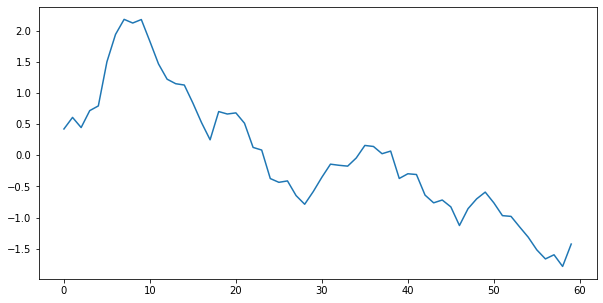

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_train[0, :, 0])
plt.show()

In [14]:
x_test, y_test = [], []
for dataset in test_datasets:
    _x_test, _y_test = zip(*dataset.map(normalize_sequence).as_numpy_iterator())
    x_test.extend(_x_test)
    y_test.extend(_y_test)
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [15]:
x_test, y_test = x_test.squeeze(axis=1), y_test.squeeze(axis=1)

In [16]:
x_test.shape

(4065, 60, 5)

In [17]:
y_test.shape

(4065, 1)

In [18]:
#np.savez('stockprice5', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [2]:
npz = np.load('stockpreice5.npz')

x_train = npz['x_train']
y_train = npz['y_train']
x_test = npz['x_test']
y_test = npz['y_test']

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13760, 60, 5) (13760, 1) (4065, 60, 5) (4065, 1)


In [4]:
input_dim = 5
n_rnn_layers = 3
x_dims = 8
latent_dims=8

In [5]:
def build_encoder():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(None, input_dim)))
    print(model.output_shape)
    
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(x_dims, activation='relu')))
    print(model.output_shape)
    
    for _ in range(n_rnn_layers-1):
        model.add(tf.keras.layers.LSTM(x_dims, return_sequences=True, recurrent_dropout=0.2))
        print(model.output_shape)
        
    model.add(tf.keras.layers.LSTM(x_dims, recurrent_dropout=0.2))
    print(model.output_shape)
    
    model.add(tf.keras.layers.Dense(1))
    return model

In [6]:
model = build_encoder()

(None, None, 5)
(None, None, 8)
(None, None, 8)
(None, None, 8)
(None, 8)


2021-11-16 08:02:25.513997: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-16 08:02:25.515702: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-16 08:02:25.548140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2021-11-16 08:02:25.548186: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-16 08:02:25.550896: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-16 08:02:25.550995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

In [7]:
tmp_x_batch = tf.random.normal((1, 32, input_dim))
model(tmp_x_batch)

2021-11-16 08:02:26.196980: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.05091301]], dtype=float32)>

In [8]:
batch_size=16
epochs = 50

In [9]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer = 'adam',
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [10]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs
)

2021-11-16 08:02:26.501539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-16 08:02:26.502173: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3299990000 Hz


Epoch 1/50
860/860 [==============================] - 110s 126ms/step - loss: 1.0686 - mean_absolute_error: 1.0686 - val_loss: 0.8748 - val_mean_absolute_error: 0.8748
Epoch 2/50
860/860 [==============================] - 107s 125ms/step - loss: 0.8064 - mean_absolute_error: 0.8064 - val_loss: 0.8541 - val_mean_absolute_error: 0.8541
Epoch 3/50
860/860 [==============================] - 107s 124ms/step - loss: 0.7912 - mean_absolute_error: 0.7912 - val_loss: 0.8392 - val_mean_absolute_error: 0.8392
Epoch 4/50
860/860 [==============================] - 107s 125ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - val_loss: 0.8423 - val_mean_absolute_error: 0.8423
Epoch 5/50
860/860 [==============================] - 107s 125ms/step - loss: 0.7786 - mean_absolute_error: 0.7786 - val_loss: 0.8393 - val_mean_absolute_error: 0.8393
Epoch 6/50
860/860 [==============================] - 108s 125ms/step - loss: 0.7834 - mean_absolute_error: 0.7834 - val_loss: 0.8517 - val_mean_absolute_error:

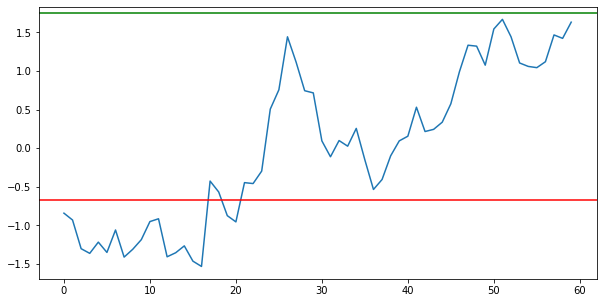

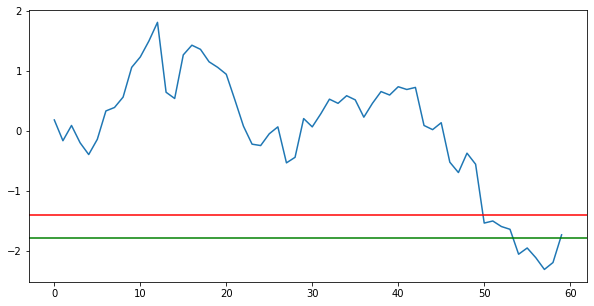

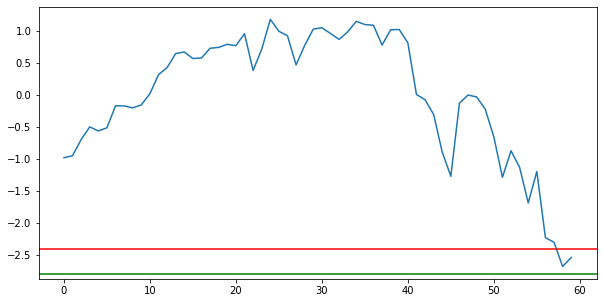

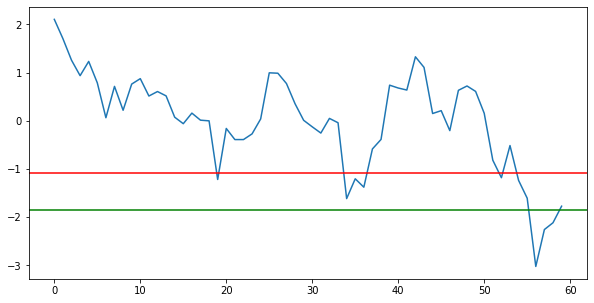

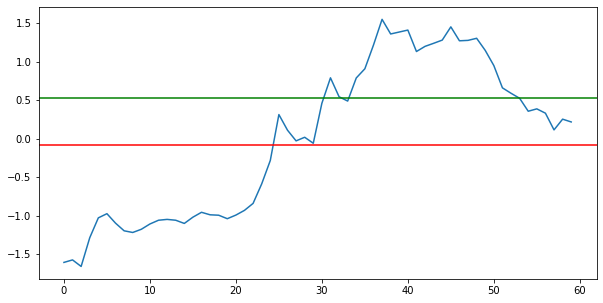

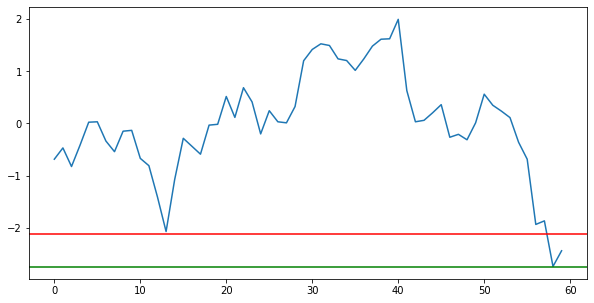

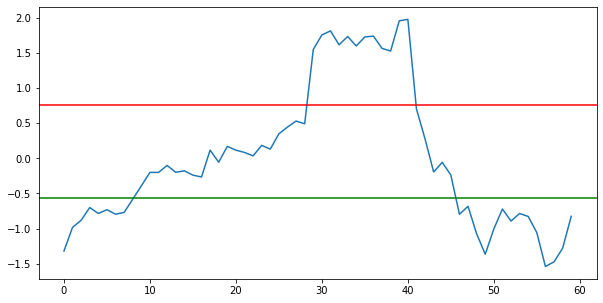

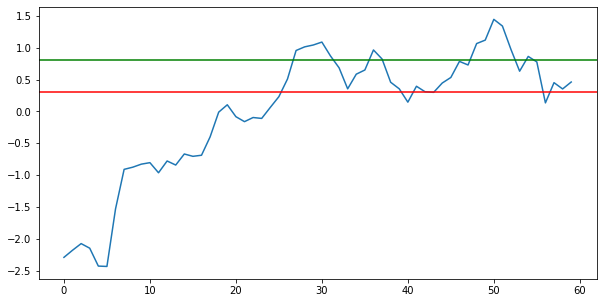

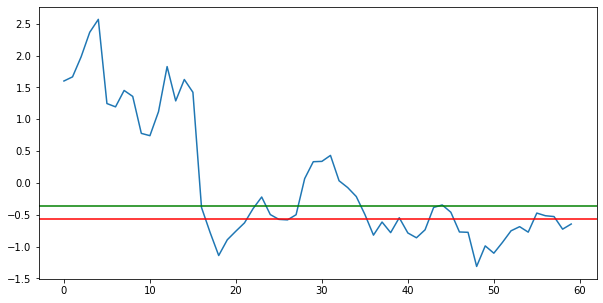

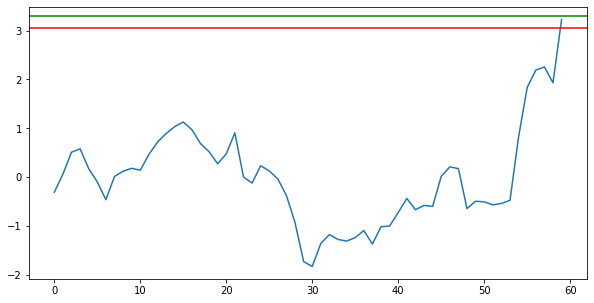

In [11]:
for _ in range(10):
    idx = np.random.randint(x_test.shape[0])
    y = model.predict(tf.expand_dims(x_test[idx], axis=0))
    
    plt.figure(figsize=(10,5))
    plt.plot(x_test[idx, :, 0])
    plt.axhline(y_test[idx], color='r')
    plt.axhline(y, color='g')
    plt.show()